# Import Necessary Packages

In [19]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np

# Load Training and Testing data

In [20]:
((x_train,y_train),(x_test,y_test)) = cifar10.load_data()

In [21]:
x_train.shape

(50000, 32, 32, 3)

In [22]:
x_test.shape

(10000, 32, 32, 3)

In [23]:
y_train.shape

(50000, 1)

In [24]:
#flattening
x_train = x_train.reshape((x_train.shape[0],-1))
x_test = x_test.reshape((x_test.shape[0],-1))

#normalizing
x_train = x_train/255.0
x_test = x_test/255.0

In [25]:
x_train.shape

(50000, 3072)

In [26]:
x_test.shape

(10000, 3072)

In [27]:
#labelling
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the network architecture using Keras

In [28]:
model = Sequential()
model.add(Dense(64, input_shape=(3072,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))

C:\Users\abhij\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#  Train the model using Adam optimizer

In [29]:
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [30]:
H = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs )

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2625 - loss: 2.0096 - val_accuracy: 0.3583 - val_loss: 1.7664
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3692 - loss: 1.7500 - val_accuracy: 0.3978 - val_loss: 1.6583
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4003 - loss: 1.6754 - val_accuracy: 0.4021 - val_loss: 1.6604
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4154 - loss: 1.6249 - val_accuracy: 0.4220 - val_loss: 1.6075
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4266 - loss: 1.6008 - val_accuracy: 0.4195 - val_loss: 1.6172
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4342 - loss: 1.5802 - val_accuracy: 0.4373 - val_loss: 1.5778
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4426 - loss: 1.5589 - val_accuracy: 0.4504 - val_loss: 1.5455
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4395 - loss: 1.5602 -

# Evaluate the network

In [31]:
predictions = model.predict(x_test)
print(classification_report(y_test.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names = [str(x) for x in lb.classes_]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.47      0.53      0.50      1000
           1       0.57      0.53      0.55      1000
           2       0.33      0.26      0.29      1000
           3       0.33      0.18      0.24      1000
           4       0.39      0.31      0.35      1000
           5       0.38      0.39      0.38      1000
           6       0.44      0.53      0.48      1000
           7       0.41      0.64      0.50      1000
           8       0.56      0.63      0.59      1000
           9       0.54      0.49      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.44      0.45      0.44     10000
weighted avg       0.44      0.45      0.44     10000



#  Plot the training loss and accuracy

[]

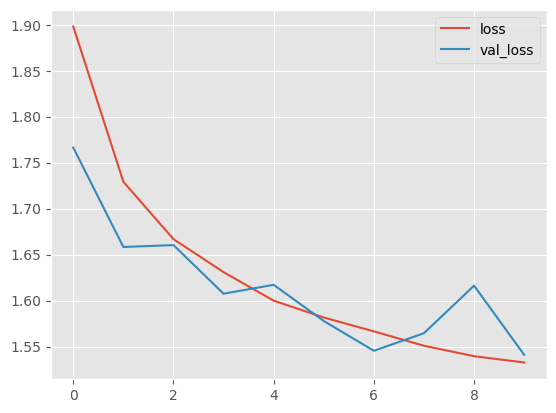

In [32]:
plt.style.use('ggplot')
plt.figure()

plt.plot(np.arange(0, epochs), H.history["loss"],label="loss")
plt.plot(np.arange(0,epochs), H.history["val_loss"], label="val_loss")

plt.legend()
plt.plot()

[]

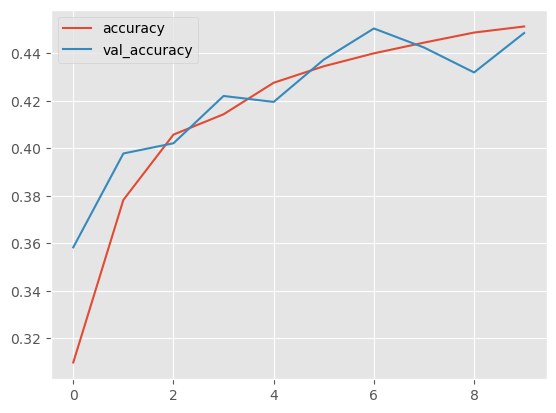

In [33]:
plt.plot(np.arange(0,epochs),H.history["accuracy"],label="accuracy")
plt.plot(np.arange(0,epochs),H.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.plot()